In [2]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>Graph Representation of Timeseries Signals</i></h1>
    <h3><i>Module 2-2</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Max Chumley
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

# Overview

</br></br></br>

![](figures/2-2_overview.png)

**Script:** Now we can move into other methods for embedding a timeseries. Specifically we will cover two methods for embedding a timeseries as a network or graph. Later we will also show how we can compute persistence on these networks.

## Goals of this module

- Apply the ordinal partition network to a timeseries to obtain its network representation.
- Apply the coarse-grained state space network to a timeseries to obtain its network representation.
- Compute persistent homology of a network with different distance definitions using teaspoon.


**Script:** Goals for this module are to apply the ordinal partition network and coarse grained state space network methods to a timeseries and compute persistence on those networks.

# Network Representation

- Why represent as a network?

![](figures/NetworkPipeline_pers.png)

- Computationally expensive
- May not capture attractor structure

**Script:** Why should we embed a timeseries as a network? Using a takens embedding and computing persistence as we did before is very computationally expensive because of how many points are in the embedding. This is why we had to subsample the embedding for persistence. The embedding may not capture the correct attractor structure either as we saw in the 2-1 worksheet.

# Ordinal Partitions$^{1,3}$

![](figures/permutation_sequence_animation.gif)

**Script:** The first method for embedding a timeseries as a network is using ordinal partitions. This example uses permutation groups of order 3 and we study the permutation sequence over the timeseries.

# Ordinal Partition Network (OPN)$^{1,3}$

![](figures/ordinal_partition_network_video_basic.gif)

<font color=red>Requires embedding parameters $\tau$ and $n$</font>

**Script:** Each permutation is then defined as a vertex on the network and directed edges are added when the signal jumps from one permutation to another. This results in a network being generated that represents the original timeseries. We use the same methods for estimating the delay and dimension from module 2-1 here.

# Higher Dimensional OPN ($n=7$)

![](figures/ordinal_partition_network_video_complex.gif)

**Script:** Here is an example using permutations of dimension 7.

# OPN Example

### Teaspoon Function: 

```python
teaspoon.SP.network.ordinal_partition_graph(ts, n=None, tau=None)
```
Returns the adjacency matrix of the network.

- Uses ```Multiscale Permutation Entropy``` for parameters by default.

See:
[teaspoon.SP.network_tools](https://teaspoontda.github.io/teaspoon/network.html#module-teaspoon.SP.network_tools) for miscellaneous network analysis tools built in to teaspoon.




**Script:** In teaspoon, the oridinal_partition_graph function can be used to obtain the addjecency matrix of the network. The network can then be visualized using the python networkx module.

# OPN Example

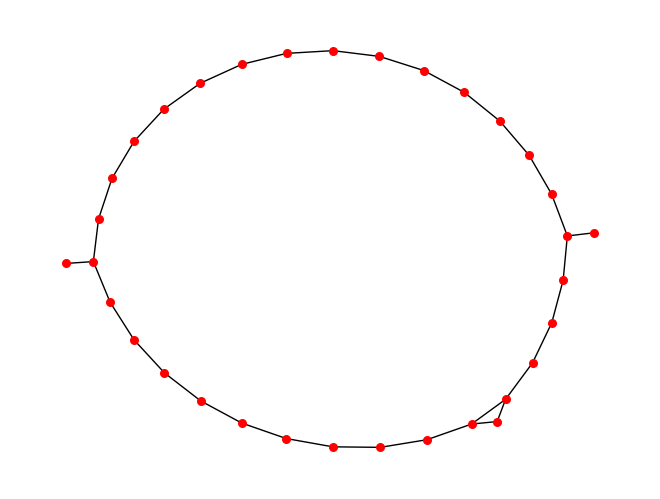

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
#teaspoon functions
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
A = ordinal_partition_graph(ts[0], n=5) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G, pos = make_network(A) #get networkx representation
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='red', node_size = 30)

**Script:** Here is an example usage of the ordinal partition network function to generate the opn for the periodic driven pendulum. We see that the network resulted in a large loop structure which indicates that it is periodic.

# Coarse-Grained State Space Network (CGSSN)$^2$

![](figures/state_assignment_OPN_and_CGSSN.png)

$s_i=3(8^0) + 5(8^1) + 2(8^2) + 1 = 172$

**Script:** Another method for representing a timeseries as a network is called the coarse grained state space network. This method is similar to the ordinal partition network in that the permutation groups are still used, but the difference here is we bin the amplitude of the signal and study the heights of the permutation group nodes. These heights allow for computing a state assignment and results in significantly more possible states. 

In the opn, the states are just the number for the corresponding permutation group but in cgssn the states are a function of the bins and the total number of bins. In this example the permutation group nodes are in bins 3,5, and 2 respectively and we have 8 total bins so the state is taken as $s_i=3(8^0) + 5(8^1) + 2(8^2) + 1 = 172$.

# CGSSN Creation

</br></br></br>

![](figures/CGSSN_2d_example_cycle.gif)


**Script:** Here is an animation of the creation of the cgssn with 10 bins. We see that each red square in the grid corresponds to a vertex in the network and the transitions between vertices correspond to moving between bins in the state space.

# CGSSN Example

### Teaspoon Function:

```python
teaspoon.SP.network.cgss_graph(ts, B_array, n=None, tau=None)
```
- Generate CGSSN adjacency matrix 

```python
teaspoon.SP.tsa_tools.cgss_binning(ts, n=None, tau=None, b=12, binning_method='equal_size', plot_binning=False)
```
- Generate bin edges for cgssn



**Script:** The teaspoon functions for CGSSN are shown here. We use the graph function to generate the network and the binning function to supply the bin edges to the graph function.

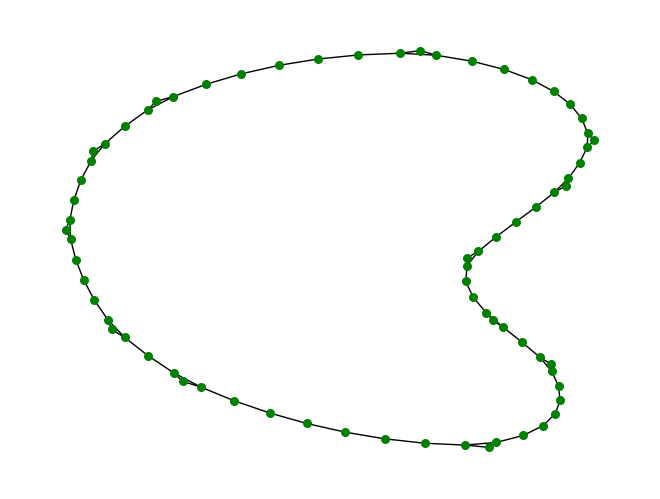

In [11]:
#import needed packages
import matplotlib.pyplot as plt
import networkx as nx
from teaspoon.SP.network import cgss_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
import teaspoon.SP.tsa_tools as tsa_tools
from teaspoon.SP.tsa_tools import takens
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.MsPE import MsPE_tau, MsPE_n
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
tau = MsPE_tau(ts[0]) # Esimtate tau and n using MSPE
n = MsPE_n(ts[0], tau)
B_array = tsa_tools.cgss_binning(ts[0], n, tau, b=8) #binning array
A = cgss_graph(ts[0], B_array, n, tau) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G, pos = make_network(A) #get networkx representation
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='green', node_size = 30)

**Script:** The resulting cgssn for the driven pendulum is here. We use the mspe methods for estimating the parameters and networkx for visualization.

# Persistent Homology of Networks

</br></br></br></br>

![](figures/2-2_overview_dm_pd.png)

**Script:** The next step in the pipeline is to compute the distance matrix so that we can obtain a persistence diagram for a network.

# Distances on Graphs$^2$

### Shortest Path:

$$C(P) = \sum_{e\in P}w(e)$$

$$D(a,b) = \min_{P}C(P)$$

- Unweighted set $w(e)=1$

**Script:** In order to compute persistence on an object, we need to know the distances between points in the object. This is done by computing a distance matrix for the network. First we need to define how distances are computed on the network. We have 4 methods for doing this and the first is shown here. This method is called the shortest path distance where we minimize the cost function c(p) as the sum of the weights. so we are looking for the path in the network with minimal weights. 

If the network is unweighted we set all w(e) to be 1 and the shortest path becomes the path with the fewest edges.

# Distances on Graphs$^2$

### Weighted Shortest Path

$$C'(P)=\sum_{e\in P}\frac{1}{w(e)}$$

$$D(a,b) = \sum_{e\in P}w(e)$$ 

- Encodes information about frequency of traversal $^2$

**Script:** The second distance is called the weighted shortest path. Here the cost function is now the sum of reciprocal weights and we take the distance as the sum of the weights along the path that minimizes the cost. Including weight information in the distance encodes information about the frequency of traversal of a path.

# Distances on Graphs$^2$

### Shortest Weighted Path

$$C'(P)=\sum_{e\in P}\frac{1}{w(e)}$$

$$D(a,b) = |\min_{P}C'(P)|~~~~~\text{(Number of edges in $P$)}$$ 

- Gives higher priority to well traveled paths $^2$

**Script:** The third distance is called the shortest weighted path. This is similar to the weighted shortest path but we take the distance to be the number of edges in the path that minimized the cost function instead of the sum of the weights. This method gives priority to well traveled paths.

# Distances on Graphs$^2$

### Diffusion Distance

$$P(i,j)=\frac{A(i,j)}{\sum_{k=1}^{|V|}A(i,k)}$$

- $A$ is adjacency matrix with no self loops
- $P$ is probability of transitioning from $i$ to $j$

#### t-random walk (walk in t steps): $P^t(a,b)$

#### Lazy Transition Probability: $\tilde{P} = \frac{1}{2}[P(a,b)+I]~~~~$ (Allows for random walk to remain at current vertex)

$$d_t(a,b)=\sqrt{\sum_{c\in V}\frac{1}{\textbf{d}(c)}[\tilde{P}^t(a,c)-\tilde{P}^t(b,c)]^2}$$

- $\textbf{d}$ is the degree vector

**Script:** The final method is called the diffusion distance where we study the probability of transitioning between nodes. We also account for the lazy transition probability where a walk may remain at the current vertex.

# Distance Matrix and Persistence

![](figures/example_periodic_2D_CGSSN_D_PH.png)

**Script:** Using these distance methods, we can obtain a distance matrix like the one shown here and obtain the persistence diagrams for the network. 

# Network Persistence Example

### Teaspoon Functions

```python
teaspoon.TDA.PHN.DistanceMatrix(A, method='shortest_unweighted_path')
```
- Supports all distances discussed previously
- Returns distance matrix

```python
teaspoon.TDA.PHN.PH_network(D, max_homology_dimension=1)
```
- Returns persistence diagram


**Script:** In teaspoon, the distance matrix function can be used to get the distance matrix for a particular distance method and the ph_network function computes persistence using that distance matrix.

1-D Persistent Homology (loops):  [[0.02592446 0.22763994]]


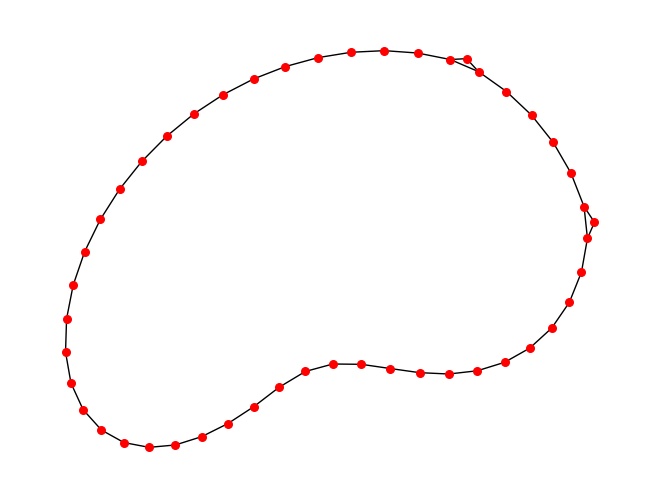

In [4]:
#teaspoon functions
import networkx as nx
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.SP.network_tools import remove_zeros
from teaspoon.SP.network_tools import make_network
from teaspoon.TDA.PHN import DistanceMatrix, point_summaries, PH_network
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
A = ordinal_partition_graph(ts[0], n = 6) #adjacency matrix
A = remove_zeros(A) #remove nodes of unused permutation
G = nx.from_numpy_matrix(A)
G.remove_edges_from(nx.selfloop_edges(G))
#create distance matrix and calculate persistence diagram
D = DistanceMatrix(A, method = 'diffusion_distance')
diagram = PH_network(D)
print('1-D Persistent Homology (loops): ', diagram[1])
G, pos = make_network(A) #get networkx representation
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='red', node_size = 30)

**Script:** Here is an example for computing persistence on the ordinal partition network for the periodic pendulum system. We see that the persistence diagram returned a single loop as expected.

# You try it 

<div class = 'row'>
<div class = 'column'>
    
- Open the [2-2-Wkst-GraphTimeSeries.ipynb](2-2-Wkst-GraphTimeSeries.ipynb) notebook and get started! 
- The notebook has both a basic example, and a challenge version.
- Answers are included but hidden.
- We will come back together in 10-15 minutes to start on the next module.
- Make sure to download your work as you go!  We won't be able to share any specific files after the conference.
    
</div>
<div class = 'column'>

![](figures/Screenshot-2-2-Wkst.png)
        
</div>
</div>

**Script:** Now you try embedding a timeseries as a network and compute its persistence diagram. Open the 2-2 worksheet for instructions. We will come back in about 10-15 minutes for the next module.

# Thank you!


- These network embedding methods are covered in more detail in our papers:

    - _Myers, Audun D., et al. "Persistent homology of coarse-grained state-space networks." Physical Review E 107.3 (2023): 034303._

    - _Myers, Audun, Elizabeth Munch, and Firas A. Khasawneh. "Persistent homology of complex networks for dynamic state detection." Physical Review E 100.2 (2019): 022314._

![](figures/ordinal_partition_network_video_complex.gif)

**Script:** Thank you! These methods are covered in more detail in our papers shown here.

# References

1. Myers, Audun, Elizabeth Munch, and Firas A. Khasawneh. "Persistent homology of complex networks for dynamic state detection." Physical Review E 100.2 (2019): 022314. 

2. Myers, Audun D., et al. "Persistent homology of coarse-grained state-space networks." Physical Review E 107.3 (2023): 034303.

3. M. Small, in 2013 IEEE International Symposium on Circuits and Systems (ISCAS2013) (IEEE, 2013).